In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(df.iloc[:,2:],inplace=True,axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [9]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:


print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())



The total number of spam and not spam message in our dataset is
 ham     4825
spam     747
Name: label, dtype: int64


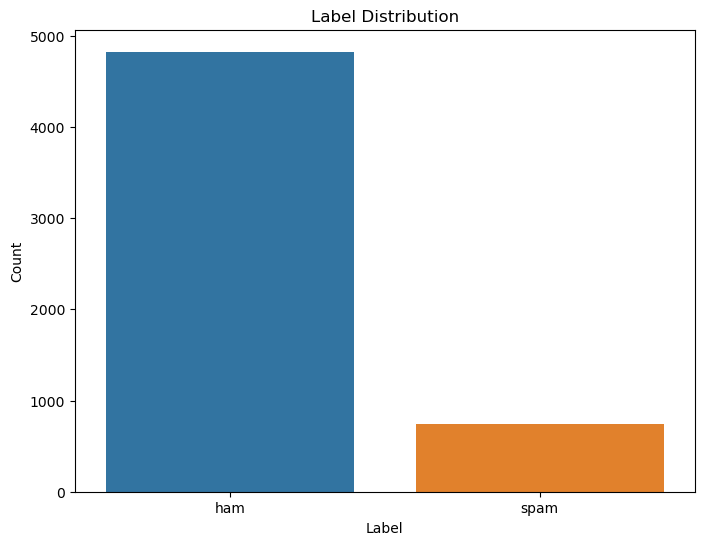

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
pip install ktrain

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
import ktrain
from ktrain import text

In [14]:
split=int(len(df)*0.90)
train_data=df.iloc[:split,:]
test_data=df.iloc[split:,:]

In [15]:
train_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5009,ham,"By the way, 'rencontre' is to meet again. Moun..."
5010,spam,You have WON a guaranteed å£1000 cash or a å£2...
5011,ham,U attend ur driving lesson how many times a wk...
5012,ham,"Uncle G, just checking up on you. Do have a re..."


In [16]:
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df=train_data,
                text_column='message',label_columns='label',
                   val_df=test_data,maxlen=300,preprocess_mode='bert')

['ham', 'spam']
   ham  spam
0  1.0   0.0
1  1.0   0.0
2  0.0   1.0
3  1.0   0.0
4  1.0   0.0
['ham', 'spam']
      ham  spam
5014  1.0   0.0
5015  1.0   0.0
5016  0.0   1.0
5017  1.0   0.0
5018  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [17]:
X_train[0].shape

(5014, 300)

In [18]:
X_train[0].ndim

2

In [19]:
X_train

[array([[ 101, 2175, 2127, ...,    0,    0,    0],
        [ 101, 7929, 2474, ...,    0,    0,    0],
        [ 101, 2489, 4443, ...,    0,    0,    0],
        ...,
        [ 101, 1057, 5463, ...,    0,    0,    0],
        [ 101, 4470, 1043, ...,    0,    0,    0],
        [ 101, 7592, 2879, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [20]:
model=text.text_classifier(name='bert',train_data=(X_train,y_train),preproc=preprocess,metrics=['accuracy'])

Is Multi-Label? False
maxlen is 300
done.


In [21]:
learner=ktrain.get_learner(model=model,train_data=(X_train,y_train),val_data=(X_test,y_test),batch_size=3)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1672/1672 [==============================] - 8363s 5s/step - loss: 1.7416 - accuracy: 0.8490


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


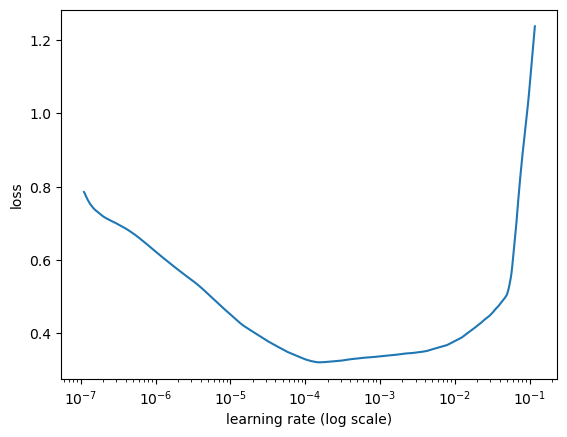

In [22]:
learner.lr_find()
learner.lr_plot()

In [23]:
 learner.fit_onecycle(lr=1e-5,epochs=1)



begin training using onecycle policy with max lr of 1e-05...
1672/1672 [==============================] - 12954s 8s/step - loss: 0.0884 - accuracy: 0.9705 - val_loss: 0.0213 - val_accuracy: 0.9946


In [24]:
predictor=ktrain.get_predictor(learner.model,preprocess)

In [31]:
save_directory = 'C:/Users/HP/Desktop/Project_Deployment'
learner.save_model(save_directory)

In [25]:
new_message=['CONGRATULATIONS! You are the lucky online winner of a brand new Sweepstakes Craftsman Tool Shed entry!',
         
                  'Thank you again for your interest in the Associate Data Scientist position in our company, and for your cooperation in the interview process so far',
             
               'Fidelity Life - $250K in life insurance for as low as $15 a month! No Exam Option available',
              ]

In [26]:
predictor.predict(new_message)

['spam', 'ham', 'spam']

In [27]:

-y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [30]:
X_test

[array([[  101,  1045,  2228, ...,     0,     0,     0],
        [  101,  4931, 14891, ...,     0,     0,     0],
        [  101,  6203,  5718, ...,     0,     0,     0],
        ...,
        [  101, 12063,  1010, ...,     0,     0,     0],
        [  101,  1996,  3124, ...,     0,     0,     0],
        [  101, 20996, 10258, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [33]:
test_data

,label,message
5014,ham,I think the other two still need to get cash b...
5015,ham,Hey gals...U all wanna meet 4 dinner at nÌÂte?
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
5017,ham,Babe ! What are you doing ? Where are you ? Wh...
5018,ham,Great! How is the office today?
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [34]:
# Assuming your test_data DataFrame already has a 'label' column
test_labels = test_data['label'].tolist()

print(test_labels)


['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ha

In [36]:
# Predict labels for test_data
predicted_test_labels = predictor.predict(test_data['message'].tolist())

print(predicted_test_labels)


['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ha

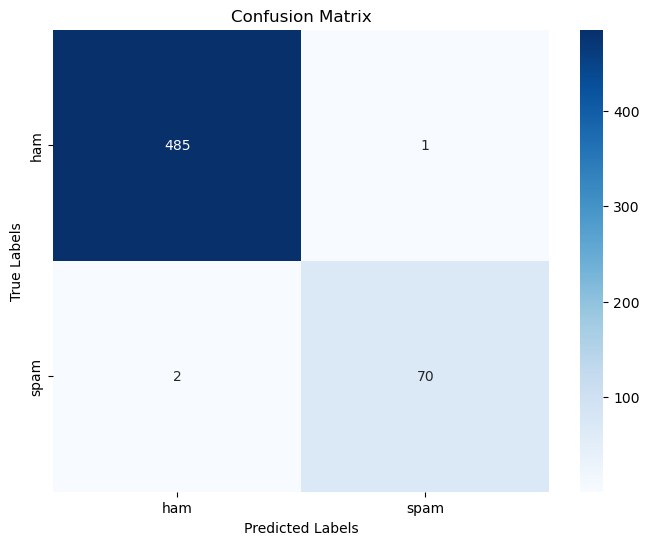

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00       486
        spam       0.99      0.97      0.98        72

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_labels, predicted_test_labels, labels=predictor.get_classes())

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=predictor.get_classes(), yticklabels=predictor.get_classes())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
class_report = classification_report(test_labels, predicted_test_labels, target_names=predictor.get_classes())
print("Classification Report:\n", class_report)

In [39]:
# Assuming your test_data DataFrame already has a 'label' column
train_labels = train_data['label'].tolist()

print(train_labels)


['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', '

In [41]:
save_directory = 'C:/Users/HP/Desktop/Project_Deployment'
predictor.save(save_directory)
